In [ ]:
!pip install transformers datasets wordcloud -q
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import pipeline

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **LOADING THE DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airline = pd.read_csv("/content/train.csv")
airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# **EDA**

**Dataframe General Information**

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      3339 non-null   object 
 1   airline_sentiment             3339 non-null   object 
 2   airline_sentiment_confidence  3339 non-null   float64
 3   negativereason                2134 non-null   object 
 4   negativereason_confidence     2450 non-null   float64
 5   airline                       3338 non-null   object 
 6   name                          3338 non-null   object 
 7   retweet_count                 3338 non-null   float64
 8   text                          3338 non-null   object 
 9   tweet_created                 3243 non-null   object 
 10  tweet_location                2319 non-null   object 
 11  user_timezone                 2231 non-null   object 
dtypes: float64(3), object(9)
memory usage: 313.2+ KB


In [ ]:
airline.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,3339.000000,2450.000000,3338.000000
mean,0.896748,0.618021,0.106052
std,0.165675,0.326748,0.350716
min,0.335000,0.000000,0.000000
25%,0.688950,0.355525,0.000000
50%,1.000000,0.666850,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,4.000000


In [ ]:
airline.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [ ]:
# hence, the df has 3339 records and 12 fields
airline.shape

(3339, 12)

# **DATA VISUALIZATION**

**Histogram**

Value Count For:  airline_sentiment
negative    2135
neutral      679
positive     525
Name: count, dtype: int64


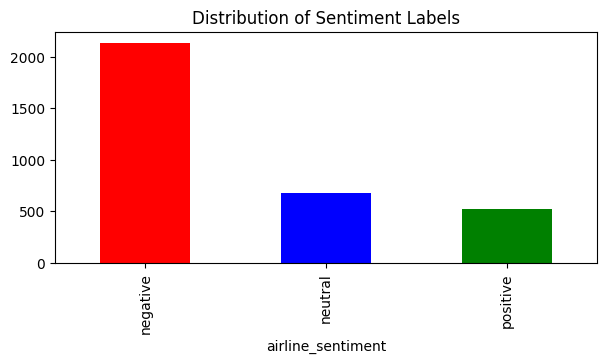

In [ ]:
import matplotlib.pyplot as plt

value_counts = airline['airline_sentiment'].value_counts()
print('Value Count For: ', value_counts)

value_counts.plot(kind='bar', title='Distribution of Sentiment Labels', figsize=(7, 3), color=['red', 'blue', 'green'])
plt.show()

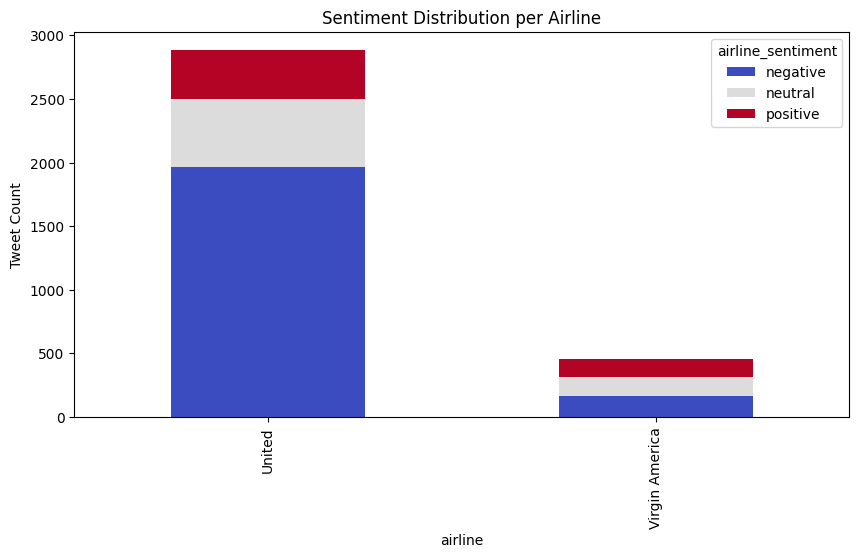

In [ ]:
airline_sentiment_counts = airline.groupby(['airline', 'airline_sentiment']).size().unstack()
airline_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10,5), colormap='coolwarm')
plt.title("Sentiment Distribution per Airline")
plt.ylabel("Tweet Count")
plt.show()


<ipython-input-27-2c558d4bd18c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='airline', data=airline, order=airline['airline'].value_counts().index, palette='magma')


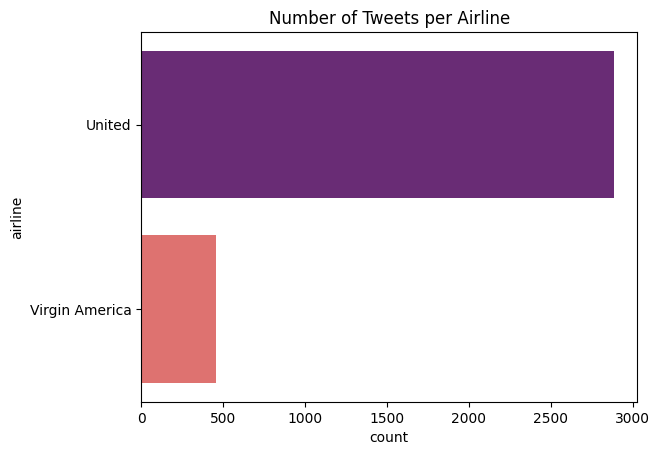

In [ ]:
sns.countplot(y='airline', data=airline, order=airline['airline'].value_counts().index, palette='magma')
plt.title("Number of Tweets per Airline")
plt.show()


<ipython-input-11-7cda52e59a17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='airline_sentiment',


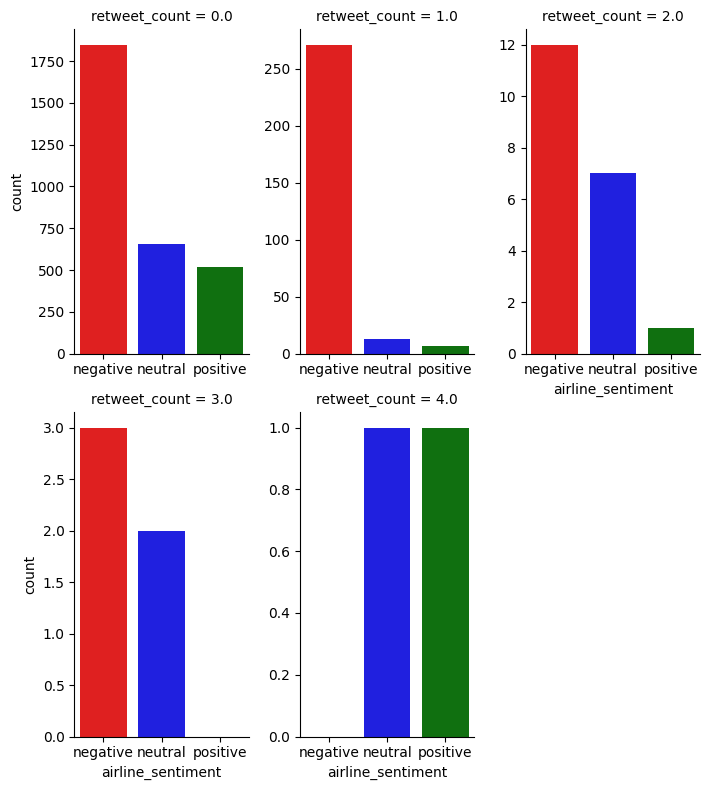

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='airline_sentiment',
            data=airline,
            order=['negative', 'neutral', 'positive'],
            kind='count',
            col='retweet_count',
            col_wrap=3,
            height=4,
            aspect=0.6,
            sharex=False,
            sharey=False,
            palette={'negative': 'red', 'neutral': 'blue', 'positive': 'green'})

plt.show()

<ipython-input-22-80e0889686f7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline_sentiment', y='airline_sentiment_confidence', data=airline, palette='pastel')


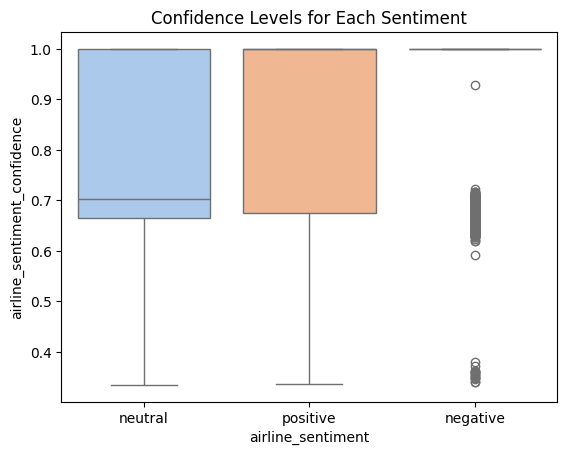

In [ ]:
sns.boxplot(x='airline_sentiment', y='airline_sentiment_confidence', data=airline, palette='pastel')
plt.title("Confidence Levels for Each Sentiment")
plt.show()


<ipython-input-32-e6e5dc3184a9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline_sentiment', y='negativereason_confidence', data=airline, palette='cool')


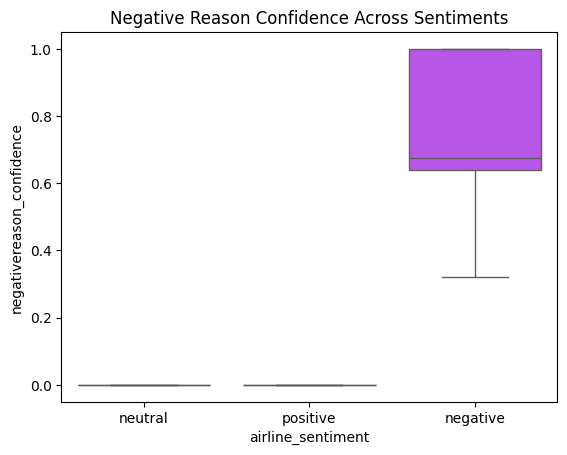

In [ ]:
sns.boxplot(x='airline_sentiment', y='negativereason_confidence', data=airline, palette='cool')
plt.title("Negative Reason Confidence Across Sentiments")
plt.show()


<ipython-input-18-7f57fa136bc0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='negativereason', data=airline, order=airline['negativereason'].value_counts().index, palette='magma')


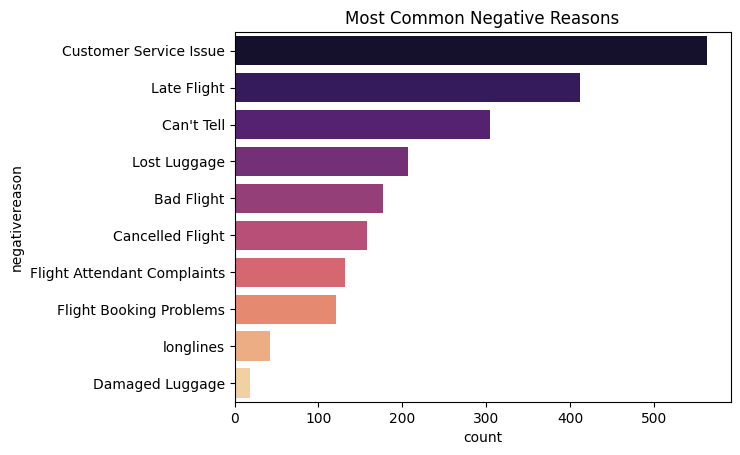

In [ ]:
sns.countplot(y='negativereason', data=airline, order=airline['negativereason'].value_counts().index, palette='magma')
plt.title("Most Common Negative Reasons")
plt.show()


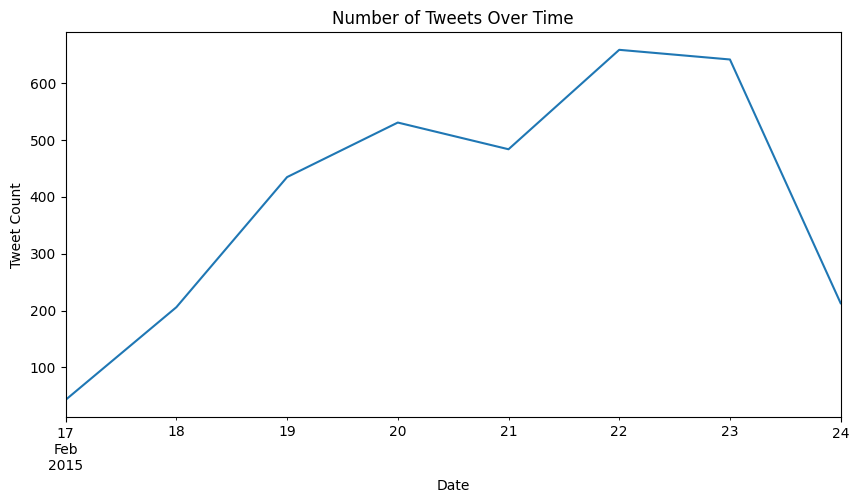

In [ ]:
airline['tweet_created'] = pd.to_datetime(airline['tweet_created'], errors='coerce') # Adding errors='coerce' to handle invalid date formats
airline.set_index('tweet_created').resample('D').count()['tweet_id'].plot(figsize=(10,5))
plt.title("Number of Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.show()

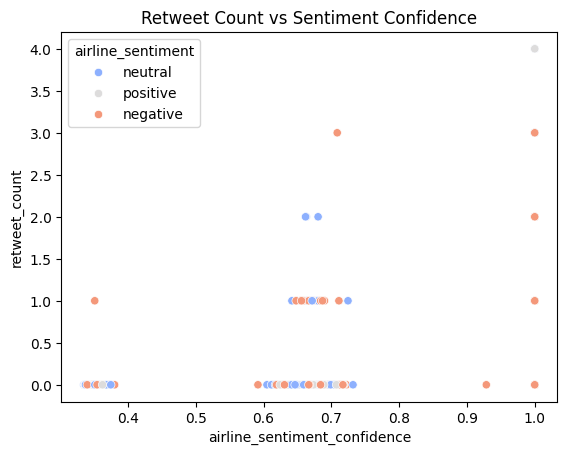

In [ ]:
sns.scatterplot(x='airline_sentiment_confidence', y='retweet_count', hue='airline_sentiment', data=airline, palette='coolwarm')
plt.title("Retweet Count vs Sentiment Confidence")
plt.show()


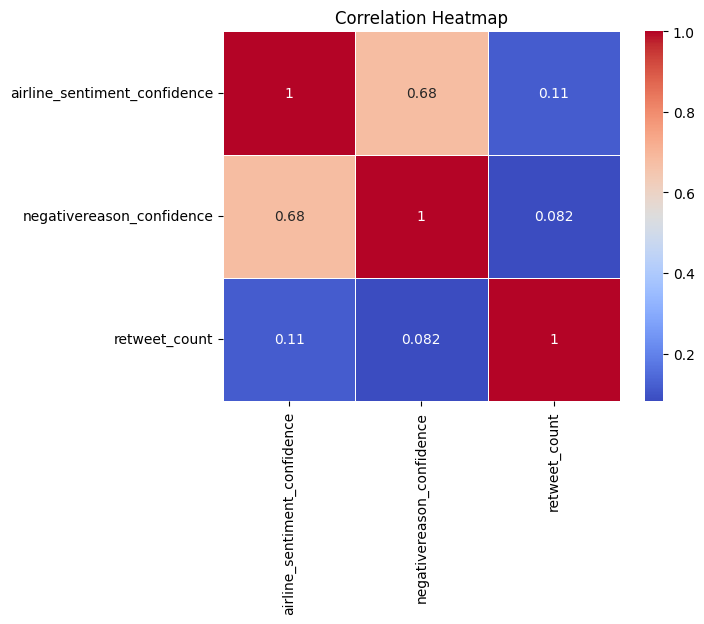

In [ ]:
corr = airline[['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

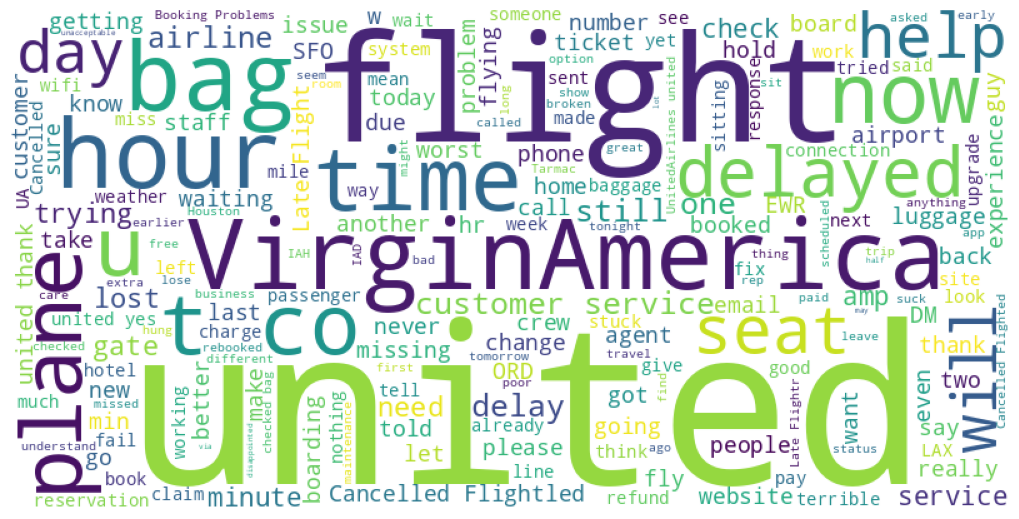

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(review for review in airline.text)

wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# **DATA PREPROCESSING**

In [ ]:
# IMPORT DATA TWEETS: Airlines
df_tweets_air_full = airline
df_selected = df_tweets_air_full[['airline_sentiment', 'tweet_location', 'airline']]

# abbreviate Airline names
df_selected['airline'].replace({"Virgin America": "Virgin"}, inplace=True)
df_selected['airline'].replace({"Southwest": "Southw."}, inplace=True)
df_selected['airline'].replace({"US Airways": "US Airw."}, inplace=True)

df_neg = df_selected[df_selected['airline_sentiment'] == 'negative']
df_ntr = df_selected[df_selected['airline_sentiment'] == 'neutral']
df_pos = df_selected[df_selected['airline_sentiment'] == 'positive']
print(df_selected.info(), "\n")

tweet_counts = df_selected['airline'].value_counts()
tweets_amount = len(df_selected)
print(f"TOTAL    tweet count: {tweets_amount}")
print(f"negative tweet count: {len(df_neg)}")
print(f"neutral  tweet count: {len(df_ntr)}")
print(f"positive tweet count: {len(df_pos)}")

print("\n", tweet_counts, "\n")

dict_air = []
airlines = list(df_selected['airline'].unique())

for airl in airlines:  # calculate distribution of tweet data among airlines
    tweet_count = list(df_selected['airline']).count(airl)
    tweet_percentage = round(tweet_count/tweets_amount, 4)
    count_neg = list(df_neg['airline']).count(airl)
    count_ntr = list(df_ntr['airline']).count(airl)
    count_pos = list(df_pos['airline']).count(airl)

    dict_air.append({'airline_name': airl,
                     'tweet_count': tweet_count,
                     'percentage': tweet_percentage,
                     'count_neg': count_neg,
                     'count_ntr': count_ntr,
                     'count_pos': count_pos})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  3339 non-null   object
 1   tweet_location     2319 non-null   object
 2   airline            3338 non-null   object
dtypes: object(3)
memory usage: 78.4+ KB
None 

TOTAL    tweet count: 3339
negative tweet count: 2135
neutral  tweet count: 679
positive tweet count: 525

 airline
United    2884
Virgin     454
Name: count, dtype: int64 



<ipython-input-6-eba0a9be66c5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['airline'].replace({"Virgin America": "Virgin"}, inplace=True)
<ipython-input-6-eba0a9be66c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['airline'].replace({"Virgin America": "Virgin"}, inplace=True)
<ipython-input-6-eba0a9be66c5>:7: S

**Checking for null values**

In [ ]:
airline.isna().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,1205
negativereason_confidence,889
airline,1
name,1
retweet_count,1
text,1
tweet_created,96


In [ ]:
airline = airline.dropna(subset=['airline'])
airline = airline.dropna(subset=['name'])
airline = airline.dropna(subset=['text'])
airline['retweet_count'].fillna(airline['retweet_count'].mean(), inplace=True)
airline['negativereason_confidence'].fillna(airline['negativereason_confidence'].mean(), inplace=True)
airline['tweet_created'].fillna("Unknown", inplace=True)
airline['tweet_location'].fillna("Unknown", inplace=True)
airline['user_timezone'].fillna("Unknown", inplace=True)
airline.isna().sum()

<ipython-input-8-6fb0b5811fbb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airline['retweet_count'].fillna(airline['retweet_count'].mean(), inplace=True)
<ipython-input-8-6fb0b5811fbb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,1204
negativereason_confidence,0
airline,0
name,0
retweet_count,0
text,0
tweet_created,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.sparse import vstack

# Load dataset
df=airline
#df = pd.read_csv('/content/drive/Shared drives/ML Assignment/train.csv')

# Splitting into labeled and unlabeled data
labeled_data = df.dropna(subset=['negativereason'])
unlabeled_data = df[df['negativereason'].isna()]

X_labeled = labeled_data['text']
y_labeled = labeled_data['negativereason']
X_unlabeled = unlabeled_data['text'].fillna('')  # Fill NaNs in text

# Train-test split for validation
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)  # ✅ Fit on labeled data
X_test_tfidf = vectorizer.transform(X_test)
X_unlabeled_tfidf = vectorizer.transform(X_unlabeled)

# Initialize Classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = clf.predict(X_test_tfidf)
print(f"Initial Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# 🔄 Self-training Loop (Iterative Pseudo-Labeling)
CONFIDENCE_THRESHOLD = 0.9
MAX_ITER = 5

for i in range(MAX_ITER):
    print(f"\n🔁 Iteration {i+1} - Self-Training")

    # Predict probabilities for unlabeled data
    y_proba = clf.predict_proba(X_unlabeled_tfidf)
    y_pseudo = clf.classes_[np.argmax(y_proba, axis=1)]  # Get class with highest probability
    max_proba = np.max(y_proba, axis=1)  # Get max probability for each prediction

    # Select high-confidence predictions
    high_confidence_mask = max_proba >= CONFIDENCE_THRESHOLD
    newly_labeled = X_unlabeled_tfidf[high_confidence_mask]
    new_labels = y_pseudo[high_confidence_mask]

    if newly_labeled.shape[0] == 0:
        print("No new confident samples. Stopping self-training.")
        break

    # Add new pseudo-labeled samples to training set
    X_train_tfidf = vstack([X_train_tfidf, newly_labeled])  # ✅ Maintain sparse format
    y_train = np.hstack([y_train, new_labels])

    # Retrain classifier
    clf.fit(X_train_tfidf, y_train)
    print(f"Added {newly_labeled.shape[0]} pseudo-labeled samples.")

# Assign final labels to dataset
final_predictions = clf.predict(X_unlabeled_tfidf)
df.loc[df['negativereason'].isna(), 'negativereason'] = final_predictions

print("✅ Self-training complete. Labels assigned.")


Initial Model Accuracy: 0.51

🔁 Iteration 1 - Self-Training
Added 2 pseudo-labeled samples.

🔁 Iteration 2 - Self-Training
Added 5 pseudo-labeled samples.

🔁 Iteration 3 - Self-Training
Added 21 pseudo-labeled samples.

🔁 Iteration 4 - Self-Training
Added 23 pseudo-labeled samples.

🔁 Iteration 5 - Self-Training
Added 23 pseudo-labeled samples.
✅ Self-training complete. Labels assigned.


In [ ]:
df['negativereason'].isna().sum()

0

Diya's version of handling isna , decide if above is better or this is better

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# using semi supervised learning to assign labels to rows containing NaN value for negativereason (target col)
labeled_data = airline.dropna(subset=['negativereason'])
unlabeled_data = airline[airline['negativereason'].isna()]

X_labeled = labeled_data['text']
y_labeled = labeled_data['negativereason']

X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

X_unlabeled = unlabeled_data['text'].fillna('')
predicted_labels = pipeline.predict(X_unlabeled)

airline.loc[airline['negativereason'].isna(), 'negativereason'] = predicted_labels

Model Accuracy: 0.51


In [ ]:
airline.isna().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,0
negativereason_confidence,0
airline,0
name,0
retweet_count,0
text,0
tweet_created,0


In [ ]:
airline.shape

(3338, 12)

In [ ]:
airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,Customer Service Issue,0.618021,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,Unknown,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,Customer Service Issue,0.000000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,Unknown,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,Customer Service Issue,0.618021,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Unknown,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,Unknown,Pacific Time (US & Canada)


<b>NLP pre-processing techniques</b>

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):  # Handle NaN values
        return ""

    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

**Checking for duplicate values**

In [ ]:
# no duplicate values, hence no need to handle
airline.duplicated().sum()

0

# **MODELS**

<b>Assignment - 1 model with the basic parameters

In [ ]:
# ==========================
# 🚀 Airline Sentiment Analysis with Sarcasm Detection
# ==========================

# 📌 Step 1: Install Required Libraries
!pip install transformers datasets wordcloud -q
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import pipeline

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# 📌 Step 2: Load Dataset
df = pd.read_csv('/content/train.csv')  # Update path if necessary

# 📌 Step 3: Data Preprocessing


# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# 📌 Step 5: Feature Engineering (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text'])

# Encode Sentiment Labels
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_label'] = df['airline_sentiment'].map(sentiment_mapping)

y = df['sentiment_label']

# 📌 Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 7: Train ML Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"\n🔹 {name} Performance:\n")
    print(f"Training Accuracy: {model.score(X_train, y_train)}")
    print(f"Testing Accuracy: {model.score(X_test, y_test)}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# 📌 Step 8: Sarcasm Detection Using RoBERTa
sarcasm_detector = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment")

def detect_sarcasm(text):
    prediction = sarcasm_detector(text)[0]
    return prediction['label'] == "LABEL_2"  # RoBERTa's "LABEL_2" often represents sarcasm

df['sarcasm_detected'] = df['clean_text'].apply(detect_sarcasm)

# 📌 Step 9: Evaluate Sarcasm Detection
sarcasm_count = df['sarcasm_detected'].sum()
print(f"\nTotal Sarcastic Tweets Detected: {sarcasm_count}")

# 📌 Step 10: Model Deployment (Optional)
def predict_sentiment(tweet):
    processed_tweet = preprocess_text(tweet)
    features = tfidf_vectorizer.transform([processed_tweet])
    sentiment = models["Logistic Regression"].predict(features)[0]  # Choose best model
    sarcasm = detect_sarcasm(tweet)

    sentiment_map = {1: "Positive", 0: "Neutral", -1: "Negative"}
    sentiment_result = sentiment_map[sentiment]

    if sarcasm:
        sentiment_result += " (Sarcasm detected)"

    return sentiment_result

# Test the model
test_tweet = "@airline Great job on the 5-hour delay. Best experience ever! "
print("\nSample Tweet Analysis:")
print(f"Tweet: {test_tweet}")
print(f"Predicted Sentiment: {predict_sentiment(test_tweet)}")

def best_airline(df):
    airline_sentiment_counts = df.groupby('airline')['airline_sentiment'].value_counts().unstack(fill_value=0)
    airline_sentiment_counts['positive_ratio'] = airline_sentiment_counts['positive'] / (airline_sentiment_counts['negative'] + 1)  # Avoid division by zero
    best_airline = airline_sentiment_counts['positive_ratio'].idxmax()
    return best_airline

best_airline_name = best_airline(df)
print(f"\n🏆 Best Airline Based on Sentiment Analysis: {best_airline_name}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



🔹 Training Logistic Regression...

🔹 Logistic Regression Performance:

Training Accuracy: 0.8491201797079745
Testing Accuracy: 0.7125748502994012
              precision    recall  f1-score   support

          -1       0.70      0.98      0.82       416
           0       0.62      0.18      0.28       138
           1       0.89      0.37      0.52       114

    accuracy                           0.71       668
   macro avg       0.74      0.51      0.54       668
weighted avg       0.72      0.71      0.66       668

Confusion Matrix:
 [[409   5   2]
 [110  25   3]
 [ 62  10  42]]

🔹 Training SVM...

🔹 SVM Performance:

Training Accuracy: 0.9101460127293148
Testing Accuracy: 0.7365269461077845
              precision    recall  f1-score   support

          -1       0.73      0.96      0.83       416
           0       0.62      0.25      0.35       138
           1       0.85      0.51      0.64       114

    accuracy                           0.74       668
   macro avg       0

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu



Total Sarcastic Tweets Detected: 530

Sample Tweet Analysis:
Tweet: @airline Great job on the 5-hour delay. Best experience ever! 
Predicted Sentiment: Negative (Sarcasm detected)

🏆 Best Airline Based on Sentiment Analysis: Virgin America


# **ENHANCEMENTS AS PER ASSIGNMENT 2**

<b><h2>Hyper-parameter tuning along with optimization using Grid Search CV


<b> Model - performing hyper-parameter tuning along with optimization using Grid Search CV without dimensionality reduction. (Here Feature Engineering (TF-IDF) is done)


> Here it is important to note that the input dataframe is post-processing both from ML and NLP perspective




In [ ]:
from sklearn.model_selection import GridSearchCV

# 📌 Load dataframe - pre-processed output( after handling the negative reasons isna problem)
df = airline

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# 📌 Feature Engineering (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text'])

# Encode Sentiment Labels
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_label'] = df['airline_sentiment'].map(sentiment_mapping)

y = df['sentiment_label']

# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Hyperparameter Tuning
param_grid = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {"C": [0.01, 0.1, 1, 10], "solver": ['liblinear', 'lbfgs']}
    },
    "SVM": {
        "model": SVC(),
        "params": {"C": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    }
}

best_models = {}
for name, cfg in param_grid.items():
    print(f"\n🔍 Tuning {name}...")
    grid_search = GridSearchCV(cfg["model"], cfg["params"], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"\n✅ Best {name} Model: {grid_search.best_params_}")
    print(f"Training Accuracy: {grid_search.best_estimator_.score(X_train, y_train)}")
    print(f"Testing Accuracy: {grid_search.best_estimator_.score(X_test, y_test)}")
    y_pred = best_models[name].predict(X_test)
    print(classification_report(y_test, y_pred))

# Save best parameters for fine-tuning
best_params = {name: model.get_params() for name, model in best_models.items()}
pd.DataFrame(best_params).to_csv("/content/best_hyperparameters.csv", index=False)


🔍 Tuning Logistic Regression...

✅ Best Logistic Regression Model: {'C': 10, 'solver': 'liblinear'}
Training Accuracy: 0.9741573033707865
Testing Accuracy: 0.7529940119760479
              precision    recall  f1-score   support

          -1       0.78      0.93      0.85       433
           0       0.52      0.35      0.42       124
           1       0.84      0.53      0.65       111

    accuracy                           0.75       668
   macro avg       0.71      0.60      0.64       668
weighted avg       0.74      0.75      0.73       668


🔍 Tuning SVM...

✅ Best SVM Model: {'C': 1, 'kernel': 'linear'}
Training Accuracy: 0.9086142322097378
Testing Accuracy: 0.7440119760479041
              precision    recall  f1-score   support

          -1       0.75      0.95      0.84       433
           0       0.55      0.23      0.32       124
           1       0.87      0.52      0.65       111

    accuracy                           0.74       668
   macro avg       0.72      0.

<h2><b> Dimensionality Reduction - Performing PCA

> Here , we perform PCA for various n_components and best one is selected based on GridSearchCV

Model is built based on the best parameter chosen after PCA and result comparison is done based on that.



In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Load Dataset
df = airline

df['clean_text'] = df['text'].apply(preprocess_text)

# Feature Engineering (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text']).toarray()  # Convert sparse to dense

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tfidf)
print(f"\nOriginal shape: {X_scaled.shape}")
# Determine best PCA variance
variance_options = [0.90, 0.95, 0.99]
best_n_components = None
best_accuracy = 0

for var in variance_options:
    pca = PCA(n_components=var)
    X_pca = pca.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, df['airline_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1}), test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"PCA Variance {var*100:.0f}% -> Accuracy: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_n_components = pca.n_components_

print(f"\n✅ Best PCA n_components: {best_n_components}")

# Apply best PCA
pca = PCA(n_components=best_n_components)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['airline_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1}), test_size=0.2, random_state=42)

print(f"\nReduced shape: {X_pca.shape}")

# Hyperparameter Tuning
param_grid = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {"C": [0.01, 0.1, 1, 10], "solver": ['liblinear', 'lbfgs']}
    },
    "SVM": {
        "model": SVC(),
        "params": {"C": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    }
}

best_models = {}
for name, cfg in param_grid.items():
    print(f"\n🔍 Tuning {name}...")
    grid_search = GridSearchCV(cfg["model"], cfg["params"], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"\n✅ Best {name} Model: {grid_search.best_params_}")
    print(f"Training Accuracy: {grid_search.best_estimator_.score(X_train, y_train)}")
    print(f"Testing Accuracy: {grid_search.best_estimator_.score(X_test, y_test)}")
    y_pred = best_models[name].predict(X_test)
    print(classification_report(y_test, y_pred))

# Save best parameters
best_params = {name: model.get_params() for name, model in best_models.items()}
pd.DataFrame(best_params).to_csv("/content/best_hyperparameters.csv", index=False)



Original shape: (3338, 4989)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PCA Variance 90% -> Accuracy: 0.5763
PCA Variance 95% -> Accuracy: 0.5524
PCA Variance 99% -> Accuracy: 0.5808

✅ Best PCA n_components: 2648

Reduced shape: (3338, 2648)

🔍 Tuning Logistic Regression...

✅ Best Logistic Regression Model: {'C': 0.01, 'solver': 'lbfgs'}
Training Accuracy: 0.9865168539325843
Testing Accuracy: 0.7005988023952096
              precision    recall  f1-score   support

          -1       0.77      0.88      0.82       433
           0       0.37      0.34      0.35       124
           1       0.78      0.42      0.55       111

    accuracy                           0.70       668
   macro avg       0.64      0.55      0.57       668
weighted avg       0.70      0.70      0.69       668


🔍 Tuning SVM...

✅ Best SVM Model: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 0.9883895131086142
Testing Accuracy: 0.7035928143712575
              precision    recall  f1-score   support

          -1       0.72      0.91      0.81       433
           0       0.47    

<b>Below code , clearly depicts the internal processing that takes place in GridSearchCV to select the best parameter for the model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=2)
grid.fit(X_pca, y_train)

print(f"Best Parameters: {grid.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END ......................C=0.1, gamma=0.01,

<b><h2> NOVELTY - Sarcasm detection using ROBERTA

In [ ]:
#Sarcasm Detection Using RoBERTa
sarcasm_detector = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment")

def detect_sarcasm(text):
    prediction = sarcasm_detector(text)[0]
    return prediction['label'] == "LABEL_2"  # RoBERTa's "LABEL_2" often represents sarcasm

df['sarcasm_detected'] = df['clean_text'].apply(detect_sarcasm)

sarcasm_count = df['sarcasm_detected'].sum()
print(f"\nTotal Sarcastic Tweets Detected: {sarcasm_count}")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu



Total Sarcastic Tweets Detected: 530


<b><h2>Performing Sentiment Prediction using the best obtained model with Sarcasm detection

In [ ]:
def predict_sentiment(tweet):
    processed_tweet = preprocess_text(tweet)

    # Convert to TF-IDF representation
    features_tfidf = tfidf_vectorizer.transform([processed_tweet]).toarray()  # Ensure it's a dense array

    # Apply the same PCA transformation as done during training
    features_pca = pca.transform(features_tfidf)

    # Retrieve the trained Logistic Regression model
    best_logreg = best_models.get("Logistic Regression")

    if best_logreg is None:
        raise ValueError("❌ Error: Best Logistic Regression model not found. Ensure GridSearchCV was run correctly.")

    # Use the trained model for prediction
    sentiment = best_logreg.predict(features_pca)[0]  # Use best trained model
    sarcasm = detect_sarcasm(tweet)

    sentiment_map = {1: "Positive", 0: "Neutral", -1: "Negative"}
    sentiment_result = sentiment_map[sentiment]

    if sarcasm:
        sentiment_result += " (Sarcasm detected)"

    return sentiment_result

# Test the model
test_tweet = "@airline Great job on the 5-hour delay. Best experience ever!"
print("\nSample Tweet Analysis:")
print(f"Tweet: {test_tweet}")
print(f"Predicted Sentiment: {predict_sentiment(test_tweet)}")



Sample Tweet Analysis:
Tweet: @airline Great job on the 5-hour delay. Best experience ever!
Predicted Sentiment: Negative (Sarcasm detected)


<b><h3> Predicting the Best Airline based on Sentiment

In [ ]:

def best_airline(df):
    airline_sentiment_counts = df.groupby('airline')['airline_sentiment'].value_counts().unstack(fill_value=0)
    airline_sentiment_counts['positive_ratio'] = airline_sentiment_counts['positive'] / (airline_sentiment_counts['negative'] + 1)  # Avoid division by zero
    best_airline = airline_sentiment_counts['positive_ratio'].idxmax()
    return best_airline

best_airline_name = best_airline(df)
print(f"\n🏆 Best Airline Based on Sentiment Analysis: {best_airline_name}")


🏆 Best Airline Based on Sentiment Analysis: Virgin America


<h3><b> Additional Ensemble Model - Gradient Boosting </b></h3>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-5-4883906dc753>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['airline_sentiment'], palette="coolwarm")


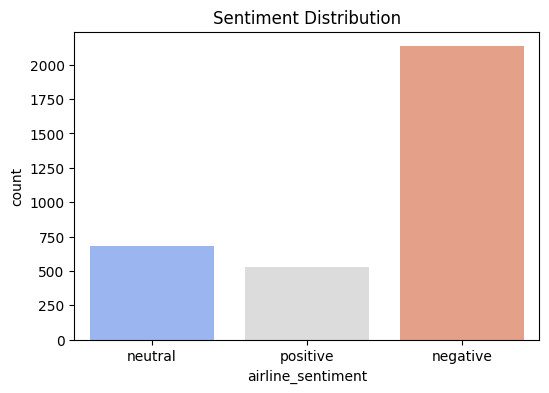

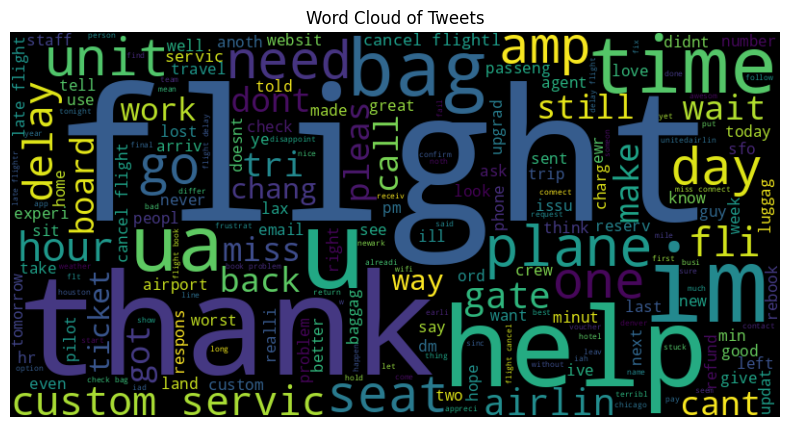


🔹 Training Logistic Regression...

🔹 Logistic Regression Performance:

              precision    recall  f1-score   support

          -1       0.74      0.96      0.84       427
           0       0.62      0.29      0.40       136
           1       0.81      0.40      0.54       105

    accuracy                           0.74       668
   macro avg       0.73      0.55      0.59       668
weighted avg       0.73      0.74      0.70       668

Confusion Matrix:
 [[410  13   4]
 [ 90  40   6]
 [ 52  11  42]]
Accuracy: 0.7365

🔹 Training SVM...

🔹 SVM Performance:

              precision    recall  f1-score   support

          -1       0.78      0.92      0.85       427
           0       0.62      0.41      0.50       136
           1       0.75      0.55      0.64       105

    accuracy                           0.76       668
   macro avg       0.72      0.63      0.66       668
weighted avg       0.75      0.76      0.74       668

Confusion Matrix:
 [[393  22  12]
 [ 73  56 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Gradient Boosting Performance:

              precision    recall  f1-score   support

          -1       0.73      0.89      0.80       427
           0       0.44      0.20      0.27       136
           1       0.63      0.49      0.55       105

    accuracy                           0.69       668
   macro avg       0.60      0.53      0.54       668
weighted avg       0.65      0.69      0.65       668

Confusion Matrix:
 [[381  26  20]
 [ 99  27  10]
 [ 45   9  51]]
Accuracy: 0.6871

🔹 Training XGBoost...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [-1  0  1]

In [ ]:
# 📌 Step 1: Install & Import Required Libraries
!pip install transformers datasets wordcloud xgboost -q

import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import pipeline

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# 📌 Step 2: Load Dataset
df = pd.read_csv('/content/myairline/train.csv')  # Update path if necessary

# 📌 Step 3: Data Preprocessing (Improved)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    if not isinstance(text, str):  # Handle NaN values
        return ""

    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    words = text.split()

    # Apply stemming & lemmatization
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words if word not in stop_words]

    return " ".join(words)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# 📌 Step 4: Exploratory Data Analysis (Optional)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['airline_sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color="black").generate(" ".join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

# 📌 Step 5: Feature Engineering (Improved TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1,2))  # Bigram model

X = tfidf_vectorizer.fit_transform(df['clean_text'])

# Encode Sentiment Labels
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_label'] = df['airline_sentiment'].map(sentiment_mapping)

y = df['sentiment_label']

# 📌 Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📌 Step 7: Train ML Models with Hyperparameter Tuning
models = {
    "Logistic Regression": LogisticRegression(C=2, max_iter=500),
    "SVM": SVC(kernel='linear', C=1.5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)
}

best_model = None
best_acc = 0

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n🔹 {name} Performance:\n")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}")

    # Save best model
    if acc > best_acc:
        best_acc = acc
        best_model = model

print(f"\n✅ Best Model: {best_model} with Accuracy: {best_acc:.4f}")

# 📌 Step 8: Sarcasm Detection Using RoBERTa (Fine-Tuned)
sarcasm_detector = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment", return_all_scores=True)

def detect_sarcasm(text):
    prediction = sarcasm_detector(text)[0]
    sarcasm_score = prediction[2]['score']  # RoBERTa's "LABEL_2" often represents sarcasm
    return sarcasm_score > 0.7  # Increase threshold for better precision

df['sarcasm_detected'] = df['clean_text'].apply(detect_sarcasm)

# 📌 Step 9: Evaluate Sarcasm Detection
sarcasm_count = df['sarcasm_detected'].sum()
print(f"\nTotal Sarcastic Tweets Detected: {sarcasm_count}")

# 📌 Step 10: Model Deployment (Best Model)
def predict_sentiment(tweet):
    processed_tweet = preprocess_text(tweet)
    features = tfidf_vectorizer.transform([processed_tweet])
    sentiment = best_model.predict(features)[0]

    sarcasm = detect_sarcasm(tweet)

    sentiment_map = {1: "Positive", 0: "Neutral", -1: "Negative"}
    sentiment_result = sentiment_map[sentiment]

    if sarcasm:
        sentiment_result += " (Sarcasm detected)"

    return sentiment_result

# Test the model
test_tweet = "@airline Great job on the 5-hour delay. Best experience ever! "
print("\nSample Tweet Analysis:")
print(f"Tweet: {test_tweet}")
print(f"Predicted Sentiment: {predict_sentiment(test_tweet)}")


<h3><b> TRANSFORMER MODELS </b></h3>

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load dataset
df = pd.read_csv("/content/myairline/train.csv")  # Ensure correct path

# Data Cleaning
df = df[['text', 'airline_sentiment']].dropna()

# Encode labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['airline_sentiment'].map(label_mapping)

# Train-Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Load DistilBERT Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

# Create PyTorch Dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, train_labels.tolist())
test_dataset = SentimentDataset(test_encodings, test_labels.tolist())

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load Pretrained DistilBERT Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
model.to(device)

# Optimizer & Loss Function
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

# Training Function
def train(model, train_loader, optimizer, criterion, epochs=3):
    model.train()
    for epoch in range(epoch   s):
        loop = tqdm(train_loader, leave=True)
        total_loss = 0
        for batch in loop:
            optimizer.zero_grad()
            batch = {key: val.to(device) for key, val in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            loop.set_description(f"Epoch {epoch+1}")
            loop.set_postfix(loss=total_loss / len(train_loader))

# Train the Model
train(model, train_loader, optimizer, criterion, epochs=3)

# Evaluation
def evaluate(model, test_loader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            batch = {key: val.to(device) for key, val in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(batch['labels'].cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    report = classification_report(true_labels, predictions, target_names=label_mapping.keys())
    return accuracy, report

# Get Accuracy and Report
accuracy, report = evaluate(model, test_loader)
print(f"\n✅ DistilBERT Accuracy: {accuracy:.4f}\n")
print(report)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 3: 100%|██████████| 167/167 [16:01<00:00,  5.76s/it, loss=0.195]



✅ DistilBERT Accuracy: 0.8159

              precision    recall  f1-score   support

    negative       0.84      0.93      0.88       433
     neutral       0.65      0.55      0.60       124
    positive       0.89      0.67      0.76       111

    accuracy                           0.82       668
   macro avg       0.79      0.72      0.75       668
weighted avg       0.81      0.82      0.81       668



In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from torch.utils.data import DataLoader, Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler  # ✅ FP16 Optimization

# ✅ Load dataset
df = pd.read_csv("/content/myairline/train.csv")
df = df[['text', 'airline_sentiment']].dropna()

# ✅ Encode labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['airline_sentiment'].map(label_mapping)

# ✅ Train-Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.15, random_state=42
)

# ✅ Load RoBERTa Tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# ✅ Tokenization (⚡ Optimized: Reduced max_length to 64)
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=64)

# ✅ Create PyTorch Dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, train_labels.tolist())
test_dataset = SentimentDataset(test_encodings, test_labels.tolist())

# ✅ DataLoader (⚡ Optimized: Reduced batch size to 16)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ✅ Load RoBERTa Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
model.to(device)

# ✅ Optimizer, Loss & Scheduler
optimizer = optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
num_training_steps = len(train_loader) * 3  # ⚡ Optimized: Reduced to 3 epochs
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

# ✅ Mixed Precision Training with FP16 (Faster on GPUs)
scaler = GradScaler()

def train(model, train_loader, optimizer, criterion, scheduler, epochs=3):  # ⚡ Optimized: Reduced epochs to 3
    model.train()
    for epoch in range(epochs):
        loop = tqdm(train_loader, leave=True)
        total_loss = 0
        for batch in loop:
            optimizer.zero_grad()
            batch = {key: val.to(device) for key, val in batch.items()}

            with autocast():  # ✅ Mixed precision
                outputs = model(**batch)
                loss = outputs.loss

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()

            total_loss += loss.item()
            loop.set_description(f"Epoch {epoch+1}")
            loop.set_postfix(loss=total_loss / len(train_loader))

# ✅ Train the Model
train(model, train_loader, optimizer, criterion, lr_scheduler, epochs=3)

# ✅ Save Model as Pickle File
model.cpu()  # Move to CPU before saving
with open("roberta_sentiment.pkl", "wb") as f:
    pickle.dump(model, f)
print("\n✅ Model saved as 'roberta_sentiment.pkl'")

# ✅ Evaluation Function
def evaluate(model, test_loader):
    model.to(device)
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            batch = {key: val.to(device) for key, val in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(batch['labels'].cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    report = classification_report(true_labels, predictions, target_names=label_mapping.keys())
    return accuracy, report

# ✅ Load & Evaluate Model
with open("roberta_sentiment.pkl", "rb") as f:
    model = pickle.load(f)
model.to(device)

accuracy, report = evaluate(model, test_loader)
print(f"\n🚀 RoBERTa Accuracy: {accuracy:.4f}\n")
print(report)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-c2a9dca01c9b>:71: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
  0%|          | 0/178 [00:00<?, ?it/s]<ipython-input-2-c2a9dca01c9b>:82: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # ✅ Mixed precision
/usr/local/lib/python3.11/dist-packages


✅ Model saved as 'roberta_sentiment.pkl'

🚀 RoBERTa Accuracy: 0.8503

              precision    recall  f1-score   support

    negative       0.90      0.91      0.91       315
     neutral       0.70      0.65      0.67       100
    positive       0.82      0.86      0.84        86

    accuracy                           0.85       501
   macro avg       0.81      0.81      0.81       501
weighted avg       0.85      0.85      0.85       501



In [ ]:
import pickle
from google.colab import files

# Save model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Download the file in Google Colab
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>